<h2 style='color:orange' align='center'>Family Image Classification.
<h2>
<h3 style='color:green' align='left'>Project is inspired by Dhaval Patel-CodeBasics
<h3>

### 

In [70]:
# Importing the neccessary Libraries
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


<h3 style='color:purple'align='center'>Preprocessing:Detect face and eyes<h3>

### Uploading the image's from the folders to the Notebook

In [71]:
img=cv2.imread('./test_images/4.jpg')
img.shape



(2176, 1279, 3)

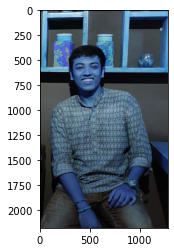

In [72]:
plt.imshow(img)

In [73]:
## To convert the image in gray scale

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray.shape




(2176, 1279)

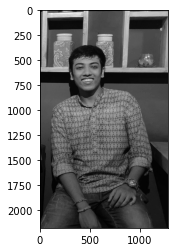

In [74]:
plt.imshow(gray, cmap='gray')

In [75]:
face_cascade = cv2.CascadeClassifier(
    './opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(
    './opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces


array([[291, 429, 357, 357]], dtype=int32)

In [76]:
(x,y,w,h)= faces[0]


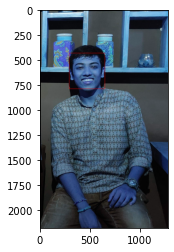

In [77]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)


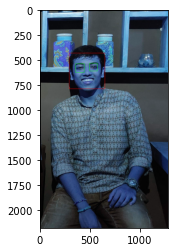

In [78]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


### Croppping the  Image to take only the neccessary part

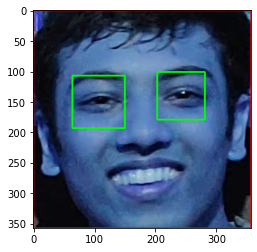

In [79]:
plt.imshow(roi_color, cmap='gray')

In [80]:
cropped_img = np.array(roi_color)
cropped_img.shape


(357, 357, 3)

## Wavelet Transform
In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc


In [81]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

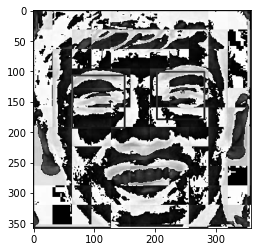

In [82]:
im_har = w2d(cropped_img, 'db1', 5)
plt.imshow(im_har, cmap='gray')


### The Following function will give us the image only if it has 2 eyes

In [83]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            final_image = cv2.cvtColor(roi_color, cv2.COLOR_BGR2GRAY)
            return final_image


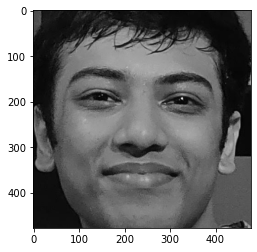

In [84]:

cropped_image = get_cropped_image_if_2_eyes('./test_images/3.jpg')
plt.imshow(cropped_image, cmap='gray')


In [85]:
path_to_data='./dataset'
path_to_cr_data='./dataset/cropped/'

In [86]:
import os

img_dirs=[]

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [87]:
img_dirs

['./dataset/maria_sharapova',
 './dataset/virat_kohli',
 './dataset/lionel_messi',
 './dataset/serena_williams',
 './dataset/roger_federer']

In [88]:
import shutil 
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [89]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        final_image = get_cropped_image_if_2_eyes(entry.path)
        if final_image is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, final_image)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/virat_kohli
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/roger_federer


In [90]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict


{'maria_sharapova': ['./dataset/cropped/maria_sharapova/maria_sharapova2.png',
  './dataset/cropped/maria_sharapova/maria_sharapova3.png',
  './dataset/cropped/maria_sharapova/maria_sharapova1.png',
  './dataset/cropped/maria_sharapova/maria_sharapova4.png',
  './dataset/cropped/maria_sharapova/maria_sharapova5.png',
  './dataset/cropped/maria_sharapova/maria_sharapova7.png',
  './dataset/cropped/maria_sharapova/maria_sharapova6.png',
  './dataset/cropped/maria_sharapova/maria_sharapova17.png',
  './dataset/cropped/maria_sharapova/maria_sharapova16.png',
  './dataset/cropped/maria_sharapova/maria_sharapova28.png',
  './dataset/cropped/maria_sharapova/maria_sharapova14.png',
  './dataset/cropped/maria_sharapova/maria_sharapova15.png',
  './dataset/cropped/maria_sharapova/maria_sharapova29.png',
  './dataset/cropped/maria_sharapova/maria_sharapova11.png',
  './dataset/cropped/maria_sharapova/maria_sharapova10.png',
  './dataset/cropped/maria_sharapova/maria_sharapova12.png',
  './dataset

In [91]:
class_dict={}

count=0

for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count+=1

class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [92]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(
            32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])


In [98]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape


(187, 4096)

## Model Training

In [105]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

In [109]:
pipe =Pipeline([
    ('scaler', StandardScaler()), 
    ('svm', SVC())
])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6842105263157895

In [110]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.73      0.89      0.80         9
           2       0.43      1.00      0.60         3
           3       0.67      0.67      0.67         9
           4       1.00      0.22      0.36         9

    accuracy                           0.68        38
   macro avg       0.72      0.73      0.65        38
weighted avg       0.76      0.68      0.65        38



In [111]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [112]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    }
}


In [113]:
import pandas as pd
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df


,model,best_score,best_params
0,svm,0.765057,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.590115,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.751724,{'logisticregression__C': 1}


In [114]:
best_estimators['svm'].score(X_test, y_test)

0.6578947368421053

In [115]:
best_estimators['random_forest'].score(X_test, y_test)

0.6578947368421053

In [117]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.7368421052631579

In [118]:
best_clf=best_estimators['svm']

Text(69.0, 0.5, 'Truth')

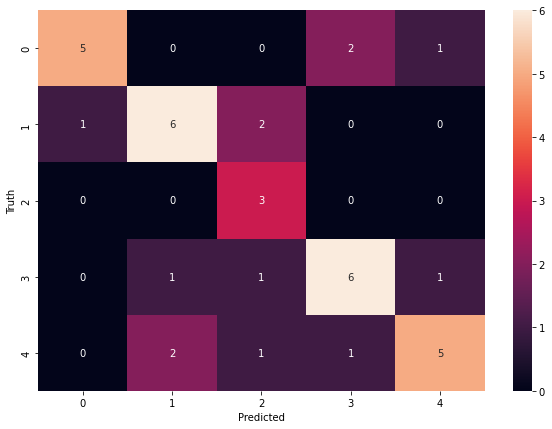

In [119]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, best_clf.predict(X_test))

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [120]:
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')


['saved_model.pkl']

In [ ]:
import json
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))
